In [2]:
# Tombo library
from tombo import tombo_helper, tombo_stats, resquiggle
# matplotlib library
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
# py3helpers
from py3helpers.classification import ClassificationMetrics
from py3helpers.utils import merge_lists
from py3helpers.seq_tools import ReferenceHandler

# Other common libraries
import pandas as pd
from sklearn.utils import assert_all_finite
from scipy import signal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import auc

import numpy as np
# built in library
import os


In [3]:
rrna_16S_stats = "16S_de_novo.tombo.stats"
save_fig_path = None
assert os.path.exists(rrna_16S_stats)
ts = tombo_stats.TomboStats(rrna_16S_stats)
for contig in ts:
    all_data = contig[4]
    position_fraction_modified = {x[2]: x[0] for x in all_data}
    break


In [16]:
from py3helpers.seq_tools import ReferenceHandler
from py3helpers.utils import merge_lists
ecoli = ReferenceHandler("/Users/andrewbailey/CLionProjects/functional_model_analysis/run_16s_rrna/baseline_model/temp/J01859.1.fa")
# https://www.ncbi.nlm.nih.gov/nuccore/J01859
variations = [76, 80, 88, 89, 90, 92, 179, 182, 193, 194, 267, 272, 283, 285, 348, 630, 632, 640, 853, 915, 965, 1027, 1071, 1074, 1099, 1206, 1280, 1321, 1401, 1402, 1405, 1406, 1490, 1493, 1497, 1517, 1518]                
mods = [515, 526, 965, 966, 1206, 1401, 1406, 1497, 1515, 1517, 1518]
for x in mods:
    print(x, position_fraction_modified[x])
miss_pos = variations + mods
must_miss = merge_lists([list(range(x-20, x+20)) for x in miss_pos])
seq = ecoli.get_sequence("J01859.1", 0, 1518)
pos = []
min_gap = 18
wait = False
curr_gap = 0
for i, x in enumerate(seq):
    if wait:
        curr_gap += 1
        if curr_gap == min_gap:
            curr_gap = 0
            wait = False
    elif i > 200 and i not in must_miss and i < 1480 and position_fraction_modified[i] < .05:
        if x == "G":
            pos.append((i, x))
            wait = True

# print(len(pos))
my_map = {"G": "GZ",
       "A": "AXY"}
with open("/Users/andrewbailey/CLionProjects/functional_model_analysis/run_16s_rrna/baseline_model/temp/16S_final.positions", "w") as fh:
    print("\t".join(["J01859.1", "1205", "+", "G", "GZ"]), file=fh)
    for x in pos:
        print("\t".join(["J01859.1", str(x[0]), "+", x[1], my_map[x[1]]]), file=fh)


515 0.007687051588657328
526 0.016705516705516704
965 0.4667446850009752
966 0.42819790828640386
1206 0.23581059893383505
1401 0.14298440979955457
1406 0.11768646717284502
1497 0.26697401508801344
1515 0.053691275167785234
1517 0.0875
1518 0.6211293260473588


In [5]:
pos

[(228, 'G'),
 (389, 'G'),
 (411, 'G'),
 (440, 'G'),
 (482, 'G'),
 (548, 'G'),
 (568, 'G'),
 (595, 'G'),
 (703, 'G'),
 (723, 'G'),
 (743, 'G'),
 (771, 'G'),
 (798, 'G'),
 (830, 'G'),
 (939, 'G'),
 (1000, 'G'),
 (1129, 'G'),
 (1180, 'G'),
 (1359, 'G'),
 (1451, 'G')]

<IPython.core.display.Javascript object>


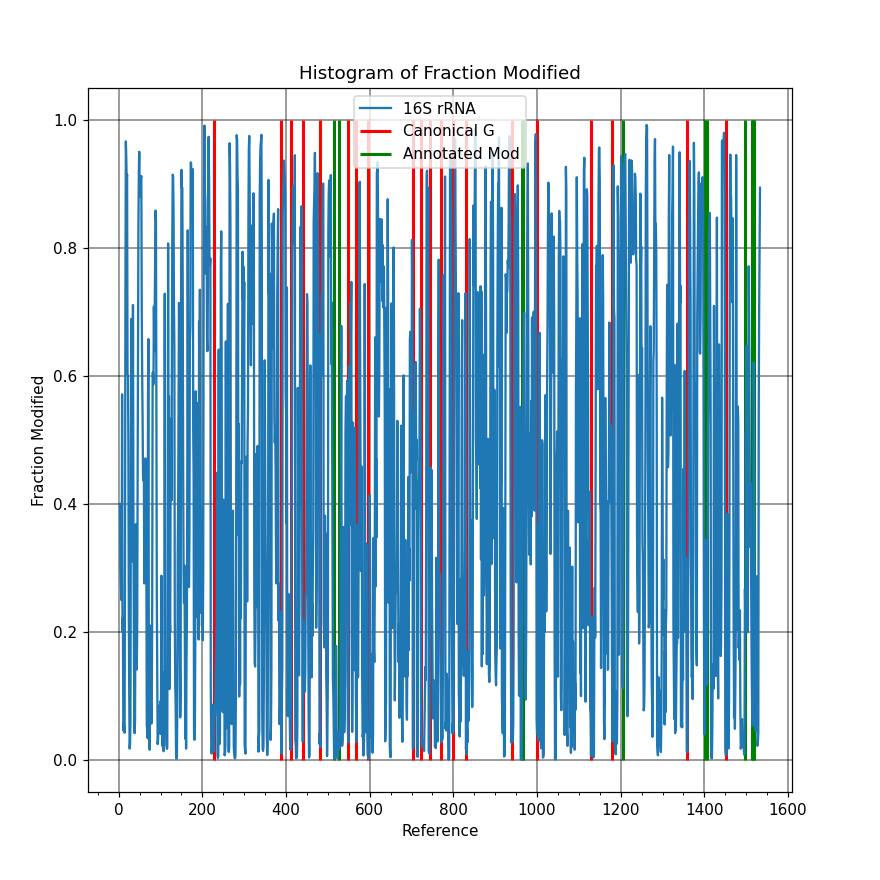

In [15]:
%matplotlib notebook

title = "Histogram of Fraction Modified"
y_label = "Reference"

fig = plt.figure(figsize=(8, 8))
panel1 = plt.axes([0.1, 0.1, .8, .8])
panel1.set_xlabel("Reference")
panel1.set_ylabel("Fraction Modified")
panel1.grid(color='black', linestyle='-', linewidth=1, alpha=0.5)

panel1.set_title(label=title)

assert os.path.exists(rrna_16S_stats)
ts = tombo_stats.TomboStats(rrna_16S_stats)
for contig in ts:
    all_data = contig[4]
    panel1.plot([x[2] for x in all_data], [x[0] for x in all_data], label="16S rRNA")

# for p, base in pos:
panel1.vlines([x for x,y in pos], 0, 1, linewidth=2, colors='r', label="Canonical G")
panel1.vlines(mods, 0, 1, linewidth=2, colors='g', label="Annotated Mod")

            
panel1.xaxis.set_major_locator(ticker.MultipleLocator(200))
panel1.xaxis.set_minor_locator(ticker.MultipleLocator(50))

panel1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

panel1.legend()

# option to save figure or just show it
if save_fig_path is not None:
    plt.savefig(save_fig_path)
